# 3. Laboratorijske vježbe iz Numeričke matematike- zad 3

Ime i prezime: *Tomislav Bjelčić*

a) Želimo odrediti godinu $\hat t$ u kojoj će ukupan broj ljudi na Zemlji prijeći 9.5 milijardi.  Populacija se računa prema Verhulstovom modelu
$$f(t)=\frac{a}{1-ce^{-dt}}$$
pri čemu su dani paramteri:
$$a=9.9606,\quad c=-1.1085\cdot 10^{25},\quad d=0.029.$$
(vrijednost $f(t)$ računa se u milijardama). Zadatak formulirajte u obliku nelinearne jednadžbe koju treba riješiti i nacrtajte funkciju čiju nultočku tražite na intervalu $[1950, 2200]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParamsDefault["figure.figsize"] = (8, 6)
plt.rcParamsDefault["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.dpi"] = plt.rcParamsDefault["figure.dpi"]


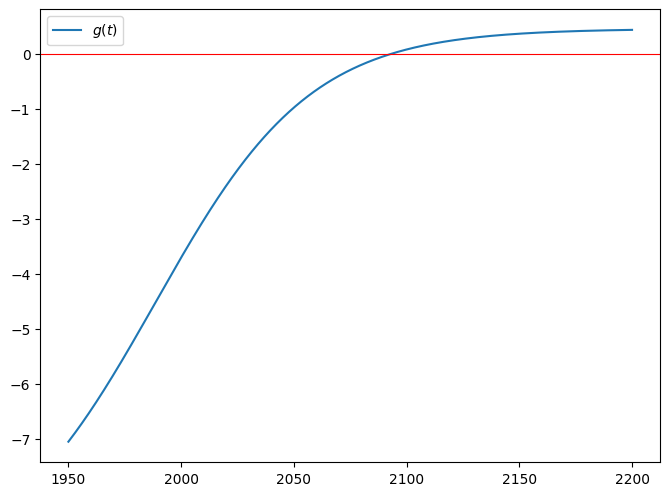

In [2]:
# Ovdje ide graf funkcije i jedna Markdown linija u kojoj ćete zapisati svoju nelinearnu jednadžbu

def g(t, a=9.9606, c=-1.1085e25, d=0.029, val=9.5):
    return a/(1 - c*np.exp(-d*t)) - val


t_domain = np.linspace(start=1950, stop=2200, num=1000, endpoint=True)

plt.plot(t_domain, g(t_domain), label="$g (t)$")
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.8)
plt.legend(loc="best")
plt.show()


Na intervalu $[1950, 2200]$ potrebno je pronaći nultočku funkcije
$$g(t) = \frac{a}{1 - ce^{-dt}} - 9.5$$
odnosno riješiti nelinearnu jednadžbu
$$\frac{a}{1 - ce^{-d \hat{t}}} - 9.5 = 0$$

b) Napišite  sada kako glasi iterativni postupak za danu funkciju ako koristite metodu sekante.

Ako se koristi metoda sekante, tada se sljedeća iteracija $t_{n+1}$ računa pomoću prethodne dvije iteracije $t_n$, $t_{n-1}$ te njihove vrijednosti funkcije na sljedeći način:
$$t_{n+1} = t_n - g(t_n) \frac{t_n - t_{n-1}}{g(t_n) - g(t_{n-1})}$$
Početne dvije iteracije $t_0$ i $t_1$ moraju biti zadane.

c) Implementirajte metodu sekante koja uzima dvije početne iteracije (za jednu od početnih iteracija uzmite $t_0=1974$, a drugu po izboru). Kao uvjet zaustavljanja možete postaviti neki od sljedećih uvjeta: $|f(x_n)|\leq \varepsilon_1$, $|x_{n+1}-x_n|\leq \varepsilon_2$ ili određeni maksimalni broj iteracija, ako nije neki od prethodna 2 uvjeta zadovoljen. Napišite nekoliko vrijednosti niza $x_n$. Za provjeru, ispišite vrijednost funkcije u izračunatoj nultočki.

In [3]:
# Ovdje ide implementacija

def secant_method(f, x0, x1, max_iter=100, termination_tolerance=1e-12, ret_iteration_sequence=False):
    x_n = x1
    x_nm1 = x0
    x_np1 = None
    f_x_n = f(x1)
    f_x_nm1 = f(x0)
    seq = [] if ret_iteration_sequence else None
    
    for i in range(1, max_iter+1):
        x_np1 = x_n - f_x_n * (x_n - x_nm1) / (f_x_n - f_x_nm1)
        if ret_iteration_sequence:
            seq.append(x_np1)
        
        # zaustavni kriterij: duljina koraka manja od tolerancije
        if np.abs(x_np1 - x_n) <= termination_tolerance:
            return x_n, i, seq
        f_x_np1 = f(x_np1)
        x_n, x_nm1, f_x_n, f_x_nm1 = x_np1, x_n, f_x_np1, f_x_n
    return x_np1, max_iter, seq

t0 = 1974
t1 = 2150
t_zero, iters, sequence = secant_method(g, x0=t0, x1=t1, ret_iteration_sequence=True)
g_t_zero = g(t_zero)
print(f"t = {t_zero}\ng(t) = {g_t_zero}\nBroj iteracija = {iters}\nNiz iteracija = {sequence}")




t = 2092.901798797497
g(t) = 0.0
Broj iteracija = 12
Niz iteracija = [2139.0292645144063, 2030.1253572863384, 2122.193409651607, 2110.830759622988, 2083.959939569079, 2095.0873605913775, 2093.149382989618, 2092.8945857974995, 2092.901822327204, 2092.9017987997304, 2092.901798797497, 2092.901798797497]


d) Dobivenu nultočku usporedite s onom koju dobijete nekom ugrađenom metodom [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar). Odaberite metodu po izboru od onih koje smo obradili na predavanjima.

In [4]:
#kod
import scipy
from scipy.optimize import root_scalar

def gprime(t, a=9.9606, c=-1.1085e25, d=0.029):
    cedt = c * np.exp(-d*t)
    return -a*d*cedt / np.square(1 - cedt)



root_result = root_scalar(g, method="newton", x0=t0, fprime=gprime)
gval = g(root_result.root)
better = "DA" if gval<g_t_zero else "NE"
print("Newtonova metoda")
print(f"Broj iteracija: {root_result.iterations}")
print(f"Nultočka: {root_result.root}")
print(f"Iznos funkcije: {gval}")
print(f"Razlika u funkcijskim vrijednostima: {np.abs(gval - g_t_zero)}")
print(f"Bolje rješenje? {better}")
print("\n\n")

root_result = root_scalar(g, method="bisect", bracket=[1950, 2200])
gval = g(root_result.root)
better = "DA" if gval<g_t_zero else "NE"
print("Metoda bisekcije")
print(f"Broj iteracija: {root_result.iterations}")
print(f"Nultočka: {root_result.root}")
print(f"Iznos funkcije: {gval}")
print(f"Razlika u funkcijskim vrijednostima: {np.abs(gval - g_t_zero)}")
print(f"Bolje rješenje? {better}")
print("\n\n")

root_result = root_scalar(g, method="secant", x0=t0, x1=t1)
gval = g(root_result.root)
better = "DA" if gval<g_t_zero else "NE"
print("Metoda sekante (scipy implementacija)")
print(f"Broj iteracija: {root_result.iterations}")
print(f"Nultočka: {root_result.root}")
print(f"Iznos funkcije: {gval}")
print(f"Razlika u funkcijskim vrijednostima: {np.abs(gval - g_t_zero)}")
print(f"Bolje rješenje? {better}")
print("\n\n")

Newtonova metoda
Broj iteracija: 7
Nultočka: 2092.901798797497
Iznos funkcije: 0.0
Razlika u funkcijskim vrijednostima: 0.0
Bolje rješenje? NE



Metoda bisekcije
Broj iteracija: 46
Nultočka: 2092.9017987974994
Iznos funkcije: 2.842170943040401e-14
Razlika u funkcijskim vrijednostima: 2.842170943040401e-14
Bolje rješenje? NE



Metoda sekante (scipy implementacija)
Broj iteracija: 11
Nultočka: 2092.901798797497
Iznos funkcije: 0.0
Razlika u funkcijskim vrijednostima: 0.0
Bolje rješenje? NE





e) Upotrijebite neku od funkcija iz SciPy biblioteke, poput [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve)  ili [link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html#scipy.optimize.broyden1) da pronađete rješenje 2 točke u kojima se kružnice
$$(x-2)^2+y^2=4$$
$$x^2+(y-3)^2=4$$
sijeku. Iz skice procijenite koje bi mogle biti pogodne početne iteracije da dobijete svaku od tih točaka.

Iz skice se vidi da je početna iteracija $\mathbf{x}_0 = (x_0, y_0) = (0, 1)$ dobar izbor za pronalazak prvog sjecišta, dok za drugo sjecište dobar izbor je početna iteracija $\mathbf{x}_0 = (2, 2)$.

In [5]:
# kod
def F(x):
    sumsq = x[0]*x[0] + x[1]*x[1]
    return [sumsq - 4*x[0], sumsq - 6*x[1] + 5]

def Jacobian_F(x):
    return [
        [2*x[0]-4, 2*x[1]],
        [2*x[0]  , 2*x[1]-6]
    ]

root1=scipy.optimize.fsolve(F, x0=[0,1], fprime=Jacobian_F)
root2=scipy.optimize.fsolve(F, x0=[2,2], fprime=Jacobian_F)

print(f"Prvo rješenje:\tx = {root1[0]}\ty = {root1[1]}")
print(f"Drugo rješenje:\tx = {root2[0]}\ty = {root2[1]}")


Prvo rješenje:	x = 0.27942330787710773	y = 1.0196155385847383
Drugo rješenje:	x = 1.720576692122892	y = 1.9803844614152615
